# Analisis practico sobre la propina de un bar 
En este análisis, he empleado herramientas como Pandas, NumPy, Matplotlib y Seaborn para investigar y comprender cómo diversos factores influyen en las propinas dentro de un entorno de bar. Me enfoqué en variables como el día de la semana, horarios, género de los clientes y su condición de fumadores o no fumadores. Este estudio tiene como objetivo mejorar la eficiencia en la recepción de propinas por parte de los trabajadores, identificando patrones que podrían contribuir a una comprensión más profunda de los comportamientos de los clientes. Al comprender mejor estos factores, pueden implementarse estrategias que optimicen la experiencia del cliente y, en consecuencia, aumenten la satisfacción y la generosidad en las propinas, mejorando así el desempeño general del personal del bar."

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#archivo dataset a analizar
sns.set(style="darkgrid")

df = sns.load_dataset("tips")
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


Text(0.5, 1.0, 'Propina fumadores y no fumadores')

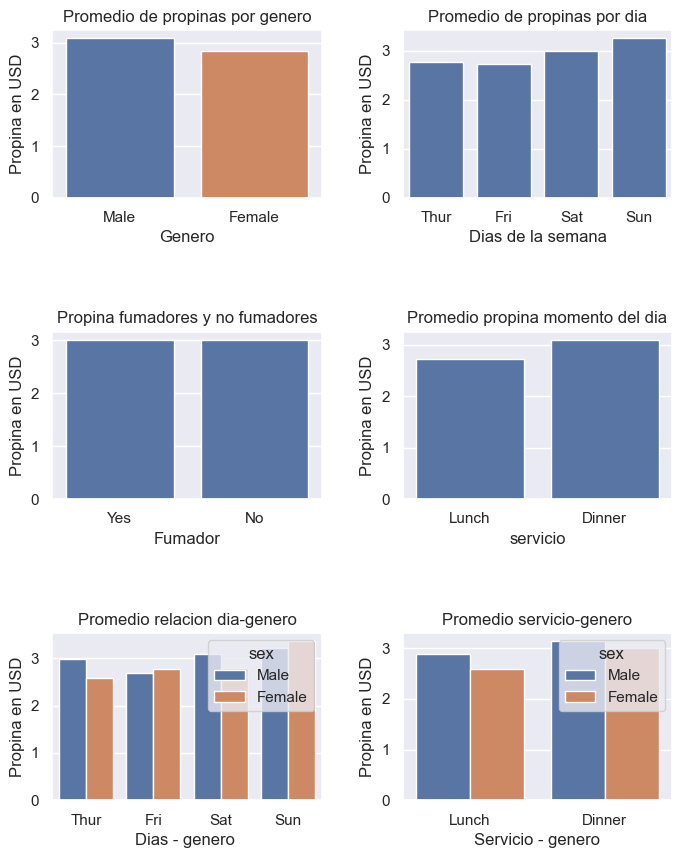

In [117]:
fig , ax = plt.subplots(3,2, figsize =(8,10))
plt.subplots_adjust(wspace=0.3, hspace=0.8)


sns.barplot(data=df, x="sex", y="tip", ax=ax[0,0], errorbar=None, hue="sex")
ax[0,0].set_xlabel("Genero")
ax[0,0].set_ylabel("Propina en USD")
ax[0,0].set_title("Promedio de propinas por genero")
# Hombres en promedio pagan mas propinas

sns.barplot(data=df, x="day", y="tip", ax=ax[0,1], errorbar=None)
ax[0,1].set_xlabel("Dias de la semana")
ax[0,1].set_ylabel("Propina en USD")
ax[0,1].set_title("Promedio de propinas por dia")
#Los domingos se recibe mas propina en promedio y los viernes cuando menos se recibe

sns.barplot(data=df, x="day", y="tip", ax=ax[2,0], hue="sex", errorbar=None)
ax[2,0].set_xlabel("Dias - genero ")
ax[2,0].set_ylabel("Propina en USD")
ax[2,0].set_title("Promedio relacion dia-genero")
#domingo mujeres dejan mas propinas en promedio, sabados los hombres.

sns.barplot(data=df, x="time", y="tip", ax=ax[2,1], hue="sex", errorbar=None)
ax[2,1].set_xlabel("Servicio - genero")
ax[2,1].set_ylabel("Propina en USD")
ax[2,1].set_title("Promedio servicio-genero")
#hombres en promedio dejan mas propinas en almuerzos y cenas que las mujeres 

sns.barplot(data=df, x="time", y="tip", ax=ax[1,1], errorbar=None)
ax[1,1].set_xlabel("servicio")
ax[1,1].set_ylabel("Propina en USD")
ax[1,1].set_title("Promedio propina momento del dia")
#se reciben mas propinas en la cena que en el almuerzo

sns.barplot(data=df, x="smoker", y="tip", ax=ax[1,0], errorbar=None)
ax[1,0].set_xlabel("Fumador")
ax[1,0].set_ylabel("Propina en USD")
ax[1,0].set_title("Propina fumadores y no fumadores")
#la propina no es afectada por si el cliente fuma o no


Text(0.5, 1.0, 'Porcentaje propina por sexo')

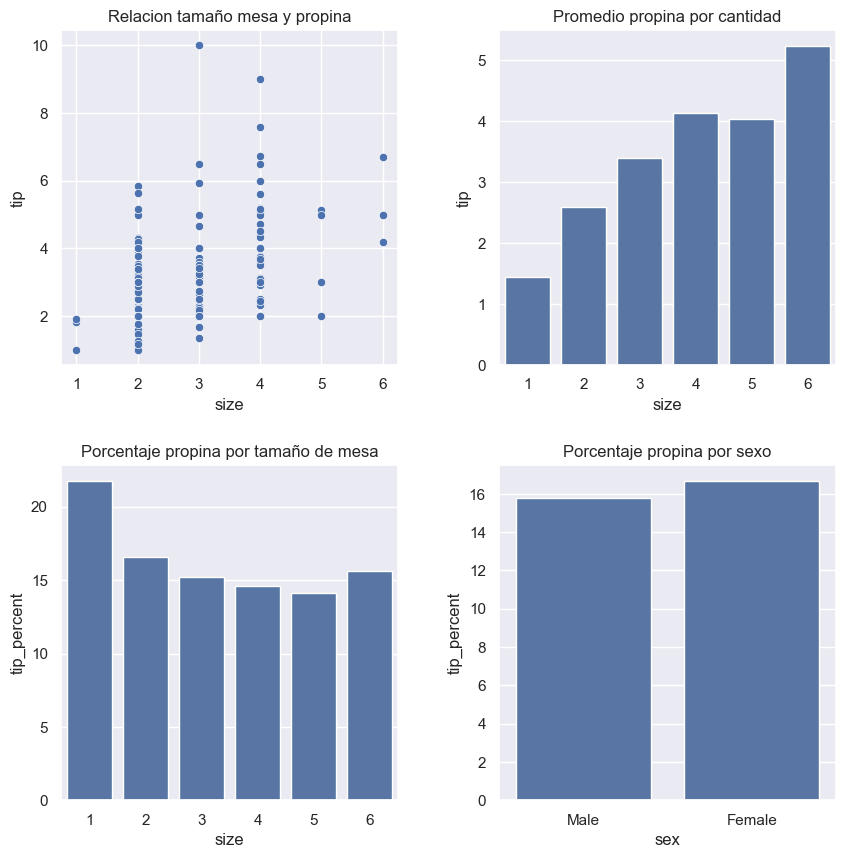

In [141]:
fig , ax = plt.subplots(2,2, figsize =(10,10))
plt.subplots_adjust(wspace=0.3, hspace=0.3)

sns.scatterplot(data=df, x="size", y="tip", ax=ax[0,0])
ax[0,0].set_title("Relacion tamaño mesa y propina")
# Grafico de dispersion entre tamaño y propina

sns.barplot(data=df, x="size", y="tip", ax=ax[0,1], errorbar=None)
ax[0,1].set_title("Promedio propina por cantidad")
#mayor mesa mayor es la propina promedio que dejan

df["tip_percent"] = (df["tip"] / df["total_bill"]) * 100 
# Agregar columna porcentaje de propina para hacer una medicion mas precisa de la propina segun el total de la cuenta

sns.barplot(data=df, x="size", y="tip_percent", ax=ax[1,0], errorbar=None)
ax[1,0].set_title("Porcentaje propina por tamaño de mesa")
#aqui se aprecia que las mesas de 1 en realidad son los que mas propinas dejan

sns.barplot(data=df, x="sex", y="tip_percent", ax=ax[1,1], errorbar=None)
ax[1,1].set_title("Porcentaje propina por sexo")
#las mujeres dejan mas propinas que los hombres en promedio sobre el total de la cuenta
